In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential()


In [ ]:
image_size=256
batch_size=32
channels=3
epochs=45

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_path = "/content/drive/MyDrive/potato-disease/training/PlantVillage"

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    shuffle=True,
    image_size=(image_size, image_size),
    batch_size=batch_size
)


Found 3096 files belonging to 3 classes.


In [ ]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len(dataset)

97

In [ ]:
for images,labels in dataset.take(1):
    print(images.shape)
    print(labels.shape)

(32, 256, 256, 3)
(32,)


In [ ]:
for images,labels in dataset.take(1):
    print(images[1])
    print(labels[1])

tf.Tensor(
[[[127. 133. 145.]
  [101. 107. 119.]
  [147. 151. 163.]
  ...
  [160. 161. 179.]
  [161. 162. 180.]
  [159. 160. 178.]]

 [[107. 113. 125.]
  [107. 113. 125.]
  [125. 129. 141.]
  ...
  [155. 156. 174.]
  [156. 157. 175.]
  [155. 156. 174.]]

 [[ 99. 103. 115.]
  [104. 108. 120.]
  [ 97. 101. 113.]
  ...
  [154. 155. 173.]
  [154. 155. 173.]
  [154. 155. 173.]]

 ...

 [[113. 114. 132.]
  [132. 133. 151.]
  [147. 148. 166.]
  ...
  [187. 190. 207.]
  [184. 187. 204.]
  [185. 188. 205.]]

 [[119. 120. 138.]
  [152. 153. 171.]
  [118. 119. 137.]
  ...
  [171. 174. 191.]
  [169. 172. 189.]
  [171. 174. 191.]]

 [[137. 138. 156.]
  [146. 147. 165.]
  [139. 140. 158.]
  ...
  [177. 180. 197.]
  [180. 183. 200.]
  [186. 189. 206.]]], shape=(256, 256, 3), dtype=float32)
tf.Tensor(0, shape=(), dtype=int32)


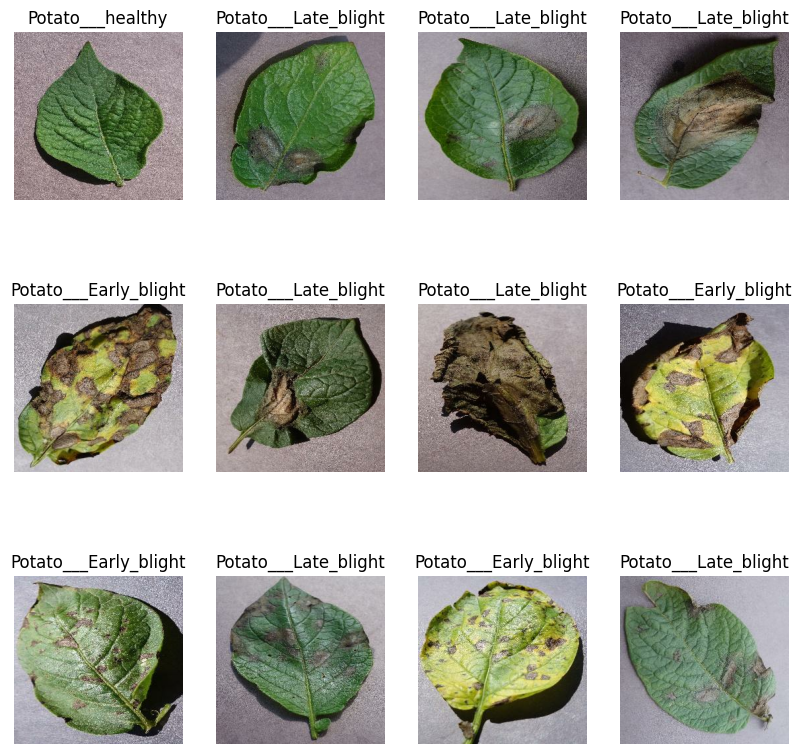

In [ ]:
plt.figure(figsize=(10,10))
for images,labels in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(images[i].numpy().astype("int"))
        plt.axis("off")
        plt.title(class_names[labels[i]])

In [ ]:
def get_dataset_partitions(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=500):

    ds_size=len(ds)
    train_size=int(ds_size*train_split)
    val_size=int(ds_size*val_split)

    if shuffle:
        ds.shuffle(shuffle_size,seed=14)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions(dataset)

In [ ]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

77
9
11


In [ ]:
train_ds = train_ds.cache().shuffle(500).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(image_size,image_size),
    tf.keras.layers.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    # tf.keras.layers.Resizing(image_size,image_size)
])

In [ ]:
#teze koddu bu
input_shape = (image_size, image_size, channels)  # Do not include batch size
n_classes=3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape=(None, *input_shape))  # `None` for dynamic batch size

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
input_shape=(batch_size,image_size,image_size,channels)
n_classes=3

model=models.Sequential([
    resize_and_rescale,
    # data_augmentation,
    layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])

model.build(input_shape=input_shape)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history=model.fit(
    train_ds,
    epochs=epochs,
    # batch_size=batch_size,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/45
77/77 ━━━━━━━━━━━━━━━━━━━━ 28s 181ms/step - accuracy: 0.5825 - loss: 0.8301 - val_accuracy: 0.6667 - val_loss: 0.6880
Epoch 2/45
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.7392 - loss: 0.5928 - val_accuracy: 0.7986 - val_loss: 0.4667
Epoch 3/45
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.8056 - loss: 0.4646 - val_accuracy: 0.8368 - val_loss: 0.3749
Epoch 4/45
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.8815 - loss: 0.2896 - val_accuracy: 0.8403 - val_loss: 0.4055
Epoch 5/45
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.9171 - loss: 0.2222 - val_accuracy: 0.8854 - val_loss: 0.3076
Epoch 6/45
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.9094 - loss: 0.2619 - val_accuracy: 0.8958 - val_loss: 0.2624
Epoch 7/45
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.9048 - loss: 0.2593 - val_accuracy: 0.8854 - val_loss: 0.3083
Epoch 8/45
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.9405 - loss: 0.1603 - val_accuracy: 0.8785 -

In [ ]:
model.evaluate(test_ds)

11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms/step - accuracy: 0.9934 - loss: 0.0194


[0.024125458672642708, 0.9912790656089783]

In [ ]:
history.params

{'verbose': 1, 'epochs': 45, 'steps': 77}

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

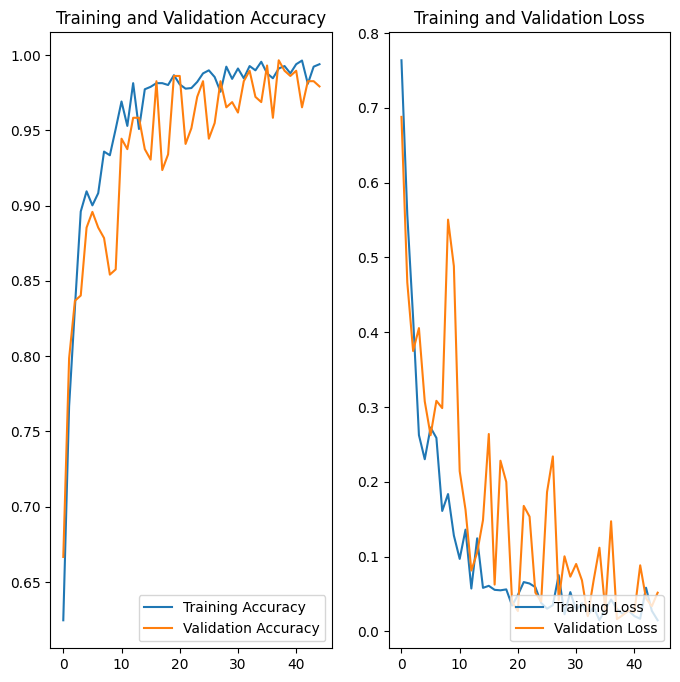

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(epochs),acc,label='Training Accuracy')
plt.plot(range(epochs),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(epochs),loss,label='Training Loss')
plt.plot(range(epochs),val_loss,label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

First image to predict:
Actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
Predicted label: Potato___Early_blight


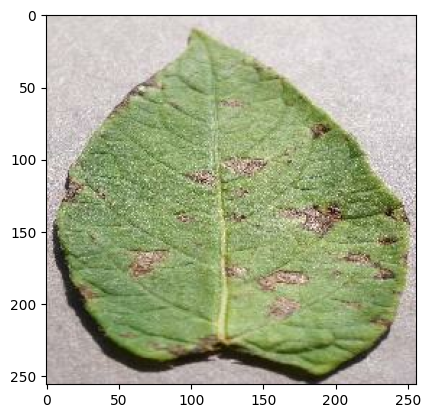

In [ ]:
for images_batch, labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype('int')
    first_label=labels_batch[0].numpy()
    print("First image to predict:")
    plt.imshow(first_image)
    print("Actual label:",class_names[first_label])

    batch_prediction=model.predict(images_batch)
    print("Predicted label:",class_names[np.argmax(batch_prediction[0])])